# Complex spectrum
In this exercise we are going to look at how to do a FFT of a
signal.
The signal we will be looking at is a sum of three cosines.

### Parameters
First we set up the parameters:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 5] # Larger figures

fs = 32000                     # sampling rate
T_max = 1                      # sim end time
t = np.arange(0, T_max, 1/fs)  # time vector
print(len(t))
f1 = 500                       # frequency of 1st tone
f2 = 1000                       # frequency of 2nd tone
f3 = 2000
A1 = 8                        # amplitudes of tones
A2 = 1
A3 = 4

32000


### Making the signal
Having set the parameters, we now calculate the sum of the
cosines:

In [2]:
s_t = A1*np.cos((2*np.pi*f1*t)+np.pi/4) \
    + A2*np.cos((2*np.pi*f2*t)+ np.pi/8) \
    + A3*np.cos(2*np.pi*f3*t)      

To ensure that the phase spectrum is correct we are going to add a small impulse
at the first time point. Try what happens if we don not do this by commenting
out (adding # at the start) the second line:

In [3]:
r_t = np.zeros_like(s_t)
r_t[0] = 0.01                # try commenting out this line - see what happens!
y_t = s_t + r_t

We can no have a look at the resulting signal. Since it has a high frequency we
will only look at the first 10 ms of the signal:

<IPython.core.display.Javascript object>


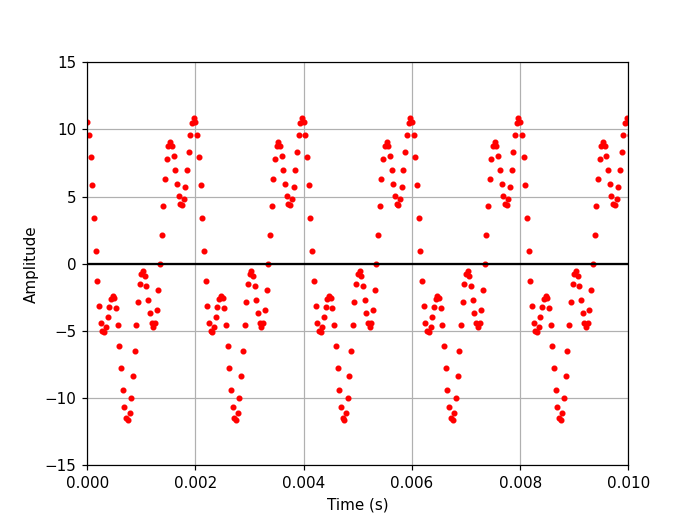

In [4]:
plt.figure(201)
plt.plot(t, s_t, '.r')
plt.axis((0, 0.01, -15, 15)) # Limiting the visible area
plt.grid()
plt.gca().axhline(color='k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Taking the FFT
The signal we have  has a total of 3200 time points over its 1 s duration. We will now take a FFT of the signal over 3200  points. For this we are using the fft module in Numpy. Additionally we are shifting the spectrum to center around 0.

In [5]:
Nfft = 3200  # Number of points in FFT
X_1 = (1/(2*fs)) * np.fft.fftshift(np.fft.fft(y_t, n=Nfft))        # FFT
f = np.arange(-Nfft/2, (Nfft/2))*fs/Nfft            # frequency scale

We can now plot the signal magnitude (absolute value of the FFT)

<IPython.core.display.Javascript object>


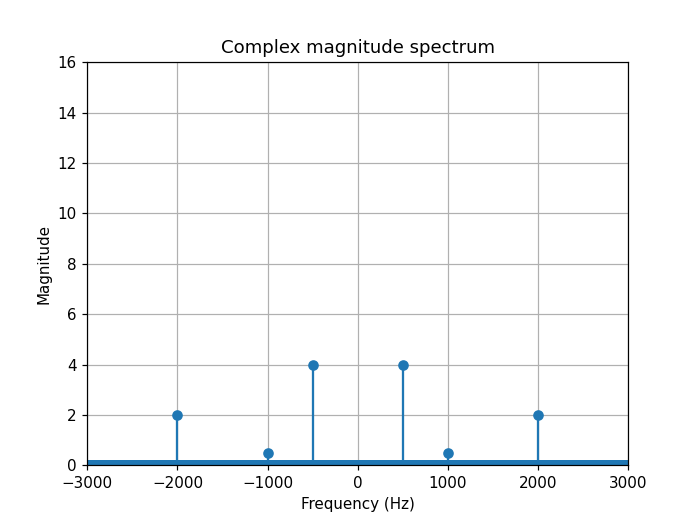

In [6]:
# plot figure (time_domain)

# plot figure (frequency domain, 2 sided)
m = np.abs(X_1)
plt.figure(202)
plt.stem(f, 20*m,basefmt='none',use_line_collection=True)
plt.axis((-3000, 3000, 0, 16))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Complex magnitude spectrum')

plt.show()

We are also interested in looking at the phase of the FFT which we can get by first removing multiples of $\pi$ from the angle of the complex FFT.

In [7]:
g = np.fmod(np.angle(X_1) , np.pi)

Having calculated the remainder, we can now plot the phase

<IPython.core.display.Javascript object>


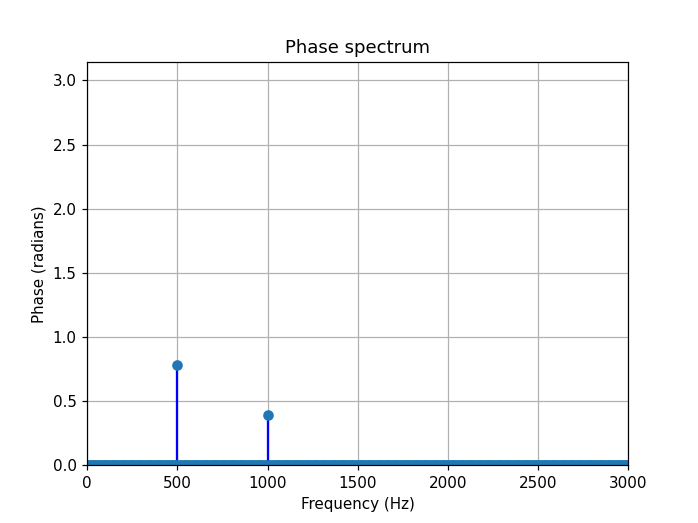

In [8]:
plt.figure(203)
plt.stem(f,g,'-ob',basefmt='none',use_line_collection=True)
plt.axis(( 0, 3000, 0, np.pi ))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase spectrum')
plt.show()

We now want to find the indexes of the significant parts of the magnitude

In [9]:
i = np.where(m > 0.01)
# print(i) # Comment out if you want to see them

We are now going to plot the Real and Imaginary parts

<IPython.core.display.Javascript object>


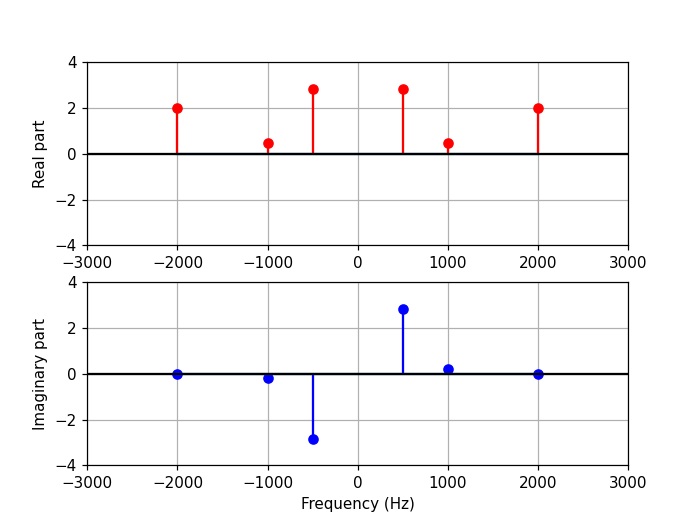

In [10]:
fig=plt.figure(204)#,figsize=(10,8))
ax1=plt.subplot(2,1,1)
ax1.stem(f[ i ],20*np.real(X_1[ i ]),'r',markerfmt='ro',basefmt='',use_line_collection=True)
ax1.axhline(color='k')
ax1.axis(( -3000, 3000, -4, 4 ))
ax1.set_ylabel('Real part')
ax1.grid()

ax2=plt.subplot(2,1,2,sharex=ax1)
ax2.stem(f[i], 20*np.imag(X_1[i]),'b',markerfmt='bo',basefmt='',use_line_collection=True)
ax2.axhline(color='k')
ax2.axis(( -3000, 3000, -4, 4 ))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Imaginary part')
ax2.grid()
plt.show()